# Constructing and Interpreting DataFrames with Visualization Libraries

# Part 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# list of values range 0-10
x_vals = [x for x in range(11)]
x_vals



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [3]:


sin_list = []
pol_list = []
abs_list = []

# calculates value of each f(x) based on sinusoid, polynomial, or absolute value formula
# then stores values in a list
for x in range(len(x_vals)):
    
    calc_sin = 3 * np.sin((2/3)*x)
    calc_pol = ((x-3)*(x-2)*(x-8))/ 10
    calc_abs = min(abs(x - 3), abs(x - 8))
    
    sin_list.append(calc_sin)
    pol_list.append(calc_pol)
    abs_list.append(calc_abs)
    
print(abs_list)

[3, 2, 1, 0, 1, 2, 2, 1, 0, 1, 2]


Text(0, 0.5, 'f(x)')

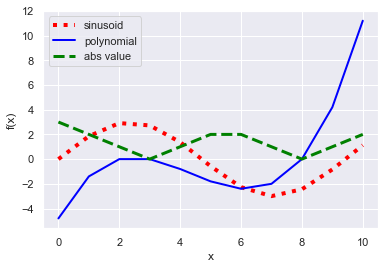

In [4]:
## Sin, Polynomial, Absolute Value Line Plot
sns.set()
#plt.ylim(0,10)

grid = np.linspace(0,100,10)

plt.plot(x_vals, sin_list, color='Red', linewidth=4, linestyle='dotted', label='sinusoid')
plt.plot(x_vals, pol_list, color='Blue', linewidth=2, linestyle='solid', label='polynomial')
plt.plot(x_vals, abs_list, color='Green', linewidth=3,linestyle='dashed', label='abs value')


plt.legend(loc='upper left')
plt.xlabel('x')
plt.ylabel('f(x)')

# Part 2

## Part 2.1 Construct a pandas dataframe to represent bike data

In [5]:
# stores data in list by column name

bike_id = ['037', '379', '398', '37B', 'BRG']

rider_id = [3,1,7,3,7]

make = ['bianchi', 'duratec', 'trek', 'trek',  'canondale']

color = ['Celeste', '<no paint>', 'Red', 'Black', 'Black']

bike_type = ['Road', 'Cyclocross', 'Road', 'Mountain', 'Mountain']

weight = [8200, 9500, 9000, 13607, 15005]

time_trial_1 = [450, 510, 432, 561, 524]
time_trial_2 = [205, 222, 211, 301, 299]

In [6]:
# initializes dataframe, assignns values of lists by column
df = pd.DataFrame()

df['Bike ID'] = bike_id
df['Rider ID'] = rider_id
df['Make'] = make
df['Color'] = color
df['Bike Type'] = bike_type
df['Weight (g)'] = weight
df['Time Trial 1 (s)'] = time_trial_1
df['Time Trial 2 (s)'] = time_trial_2




df.set_index(['Bike ID'])
df.to_csv('bike-data.csv')

df

,Bike ID,Rider ID,Make,Color,Bike Type,Weight (g),Time Trial 1 (s),Time Trial 2 (s)
0,037,3,bianchi,Celeste,Road,8200,450,205
1,379,1,duratec,<no paint>,Cyclocross,9500,510,222
2,398,7,trek,Red,Road,9000,432,211
3,37B,3,trek,Black,Mountain,13607,561,301
4,BRG,7,canondale,Black,Mountain,15005,524,299


## Part 2.2 Manipulate dataframe to answer questions

### The Bike ID associated with the greatest weight in the data is 'BRG'.

In [7]:
# finds greatest value for weight in the dataset
max_weight = df['Weight (g)'].max()

# isolates all rows where value of weight is equal to max weight
max_weight_row = df.loc[df['Weight (g)'] == max_weight]

# find value of bike id for row
max_weight_bikeid = max_weight_row['Bike ID']
max_weight_bikeid

4    BRG
Name: Bike ID, dtype: object

### The Bike ID associated with fastest average time speed is '398'

In [8]:
# calculates the mean of time trial 1 and time trial 2 for each row
# finds the minimum time, as this represents the fastest
avg_time_trials = (df['Time Trial 1 (s)'] + df['Time Trial 2 (s)']) / 2

# creates a new column for calculated mean time trials
# finds minimum of those values
df['Avg Time Trials'] = avg_time_trials
fastest_avg_time_trials = avg_time_trials.min()


# uses boolean operation to isolate bike id associated with min avg time value
fastest_bike = df.loc[df['Avg Time Trials'] == fastest_avg_time_trials]
fastest_bikeid = fastest_bike['Bike ID']


fastest_bikeid

2    398
Name: Bike ID, dtype: object

### The average weight of each bike type is 9500 for 'Cyclocross', 14306 for 'Mountain', and 8600 for 'Road' bikes.

In [9]:
# what is the avg weight of each bike by bike type
# uses group by to find the mean weight of each row by specified by bike type
bike_groups = []
bike_group_mean = df.groupby('Bike Type').mean()
bike_group_weights = bike_group_mean['Weight (g)']
bike_group_weights


Bike Type
Cyclocross     9500.0
Mountain      14306.0
Road           8600.0
Name: Weight (g), dtype: float64

# Part 3

## Part 3.1

In [10]:
imdb_df = pd.read_csv('IMDb_movies_clean.csv')
genre_df = pd.DataFrame(imdb_df.groupby('genre'))

imdb_df['duration']

0        87
1        87
2        94
3        83
4       238
       ... 
6078     92
6079    124
6080     84
6081    112
6082    116
Name: duration, Length: 6083, dtype: int64

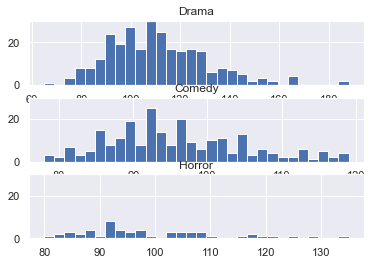

In [11]:
genres = ['Drama', 'Comedy', 'Horror']

for gen_idx, genre in enumerate(genres):
    
    # df of only movies whose genre is Drama, Comedy or Horror
    drama_movies = imdb_df.loc[imdb_df['genre'] == 'Drama']
    comedy_movies = imdb_df.loc[imdb_df['genre'] == 'Comedy']
    horror_movies = imdb_df.loc[imdb_df['genre'] == 'Horror']
    
    
    gen_bool_movies = imdb_df.loc[imdb_df['genre'] == genre]
    plt.subplot(3,1, gen_idx + 1)
    
    plt.hist(gen_bool_movies['duration'], bins=30)
    plt.gca().title.set_text(genres[gen_idx])
    plt.ylim(0, 30)
    

## Part 3.2 Scatter Plot

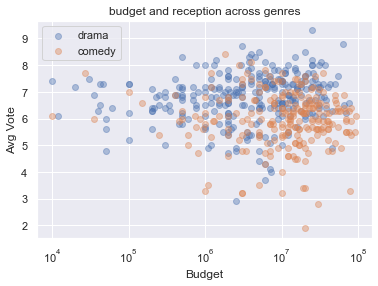

In [12]:


# stores budget and avg_vote values in lists
dram_budget = list(drama_movies['budget'])
com_budget = list(comedy_movies['budget'])

dram_vote = list(drama_movies['avg_vote'])
com_vote = list(comedy_movies['avg_vote'])

plt.scatter(dram_budget, dram_vote, label='drama', alpha=0.4)
plt.scatter(com_budget, com_vote, label='comedy', alpha=0.4)
plt.xscale('log')
plt.xlabel('Budget')
plt.ylabel('Avg Vote')
plt.title('budget and reception across genres')
plt.legend()

There doesn't seem to be an overt relationship between genre and avg vote. Drama films may have slightly higher avg vote because Comedy films seem to span as low as 2-4, while Drama films seem less likely to drop below 3-5.

From the scatter plot, Comedy films seem to have a larger budget in general. Drama films show some low budget variance that is less prevalent for Comedy films.

Taken with the case of Comedy films, larger budgets do not always result in higher rates. In this scatter plot, the lowest points of the plane occur on the high end of budgets. Additionally, for Comedy films, increasing the film's budget does not increase the likelihood of a higher rating based on the scatter plot. Comedy films on the high end for budgets are not necessarily performing better than films with low budgets in the same genre. However, it is also not clear that increasing movie budget will decrease ratings from the plot.

## Part 3.4 Line plot 

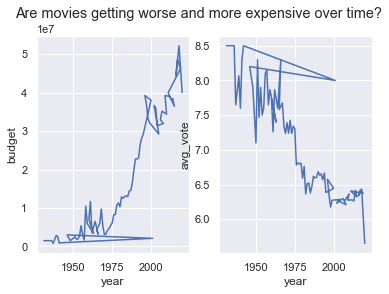

In [13]:
features = ['budget','avg_vote']

for f_idx, feature in enumerate(features):
    
    years = list(imdb_df['year'].unique())

    # takes the average of each column and stores in new df
    mean_years_df = imdb_df.groupby('year').mean()
    mean_vote = mean_years_df['avg_vote']
    mean_budget = mean_years_df['budget']

    
    plt.subplot(1,2, f_idx + 1)
    plt.plot(years, mean_years_df[feature])
    plt.xlabel('year')
    plt.ylabel(feature)
    plt.suptitle('Are movies getting worse and more expensive over time?')
    
    ### my plots are slightly noisier than the example, unsure why, but the trend of increase
    ### in budget and decrease in ratings remains

## Part 3.5

The modern budget seems to be four times as much as the average budget in 1980.

Two alternative explanations for the decrease in ratings may include a lack of reporting for positive reviews more recently. Moreover, another explanation could be that there is a lack of reporting negative reviews earlier in the 20th century.